# Split apply combine applied

In [1]:
import pandas as pd

In [25]:
summer = pd.read_csv("summer.csv")

In [26]:
summer.head()

Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver

In [27]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [33]:
medals_per_country = summer.groupby("Country").Medal.count().nlargest(n=20)
medals_per_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

In [34]:
# matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

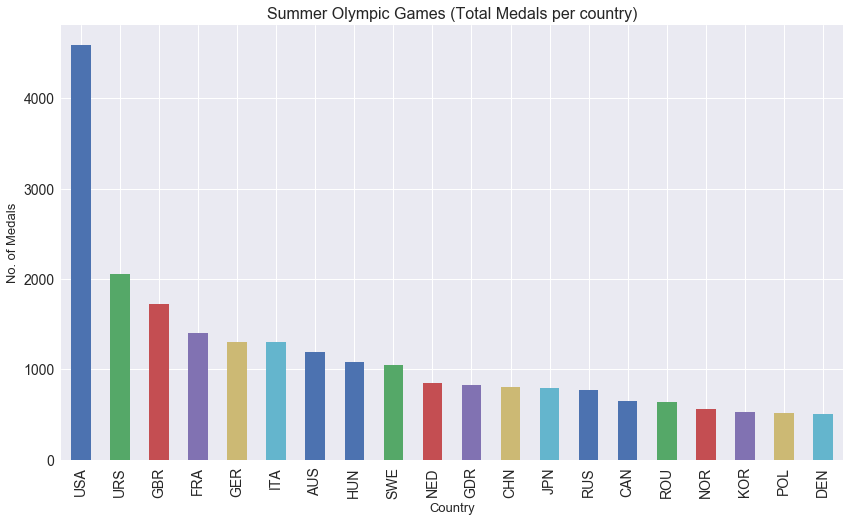

In [35]:
medals_per_country.plot(kind="bar", figsize=(14,8), fontsize=14)
plt.xlabel("Country", fontsize=13)
plt.ylabel("No. of Medals", fontsize=13)
plt.title("Summer Olympic Games (Total Medals per country)", fontsize = 16)
plt.show()

In [36]:
titanic = pd.read_csv("titanic.csv")

In [37]:
titanic.head()

Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500

In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


In [40]:
titanic.describe()

Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max                   6.000000  512.32920

In [42]:
titanic.Fare.mean()

32.30542018038328

In [48]:
titanic.groupby("Pclass").Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.707707
Name: Fare, dtype: float64

In [43]:
titanic.Survived.sum()

342

In [44]:
titanic.Survived.mean()

0.3855693348365276

In [46]:
titanic.groupby("Sex").Survived.mean()

Sex
female    0.742038
male      0.190227
Name: Survived, dtype: float64

In [47]:
titanic.groupby("Pclass").Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.244353
Name: Survived, dtype: float64

In [49]:
titanic["ad_chi"] = "adult"

In [50]:
titanic.loc[titanic.Age < 18, "ad_chi"] = "child"

In [56]:
titanic.head(20)

Survived  Pclass                                               Name  \
0          0       3                             Mr. Owen Harris Braund   
1          1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2          1       3                              Miss. Laina Heikkinen   
3          1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4          0       3                            Mr. William Henry Allen   
5          0       3                                    Mr. James Moran   
6          0       1                             Mr. Timothy J McCarthy   
7          0       3                      Master. Gosta Leonard Palsson   
8          1       3   Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   
9          1       2                 Mrs. Nicholas (Adele Achem) Nasser   
10         1       3                     Miss. Marguerite Rut Sandstrom   
11         1       1                            Miss. Elizabeth Bonnell   
12         0       3                      Mr. William Henry Saundercock   
13         0       3                         Mr. Anders Johan Andersson   
14         0       3                Miss. Hulda Amanda Adolfina Vestrom   
15         1       2                     Mrs. (Mary D Kingcome) Hewlett   
16         0       3                                Master. Eugene Rice   
17         1       2                        Mr. Charles Eugene Williams   
18         0       3  Mrs. Julius (Emelia Maria Vandemoortele) Vande...   
19         1       3                             Mrs. Fatima Masselmani   

       Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  \
0     male  22.0                        1                        0   7.2500   
1   female  38.0                        1                        0  71.2833   
2   female  26.0                        0                        0   7.9250   
3   female  35.0                        1                        0  53.1000   
4     male  35.0                        0                        0   8.0500   
5     male  27.0                        0                        0   8.4583   
6     male  54.0                        0                        0  51.8625   
7     male   2.0                        3                        1  21.0750   
8   female  27.0                        0                        2  11.1333   
9   female  14.0                        1                        0  30.0708   
10  female   4.0                        1                        1  16.7000   
11  female  58.0                        0                        0  26.5500   
12    male  20.0                        0                        0   8.0500   
13    male  39.0                        1                        5  31.2750   
14  female  14.0                        0                        0   7.8542   
15  female  55.0                        0                        0  16.0000   
16    male   2.0                        4                        1  29.1250   
17    male  23.0                        0                        0  13.0000   
18  female  31.0                        1                        0  18.0000   
19  female  22.0                        0                        0   7.2250   

   ad_chi  
0   adult  
1   adult  
2   adult  
3   adult  
4   adult  
5   adult  
6   adult  
7   child  
8   adult  
9   child  
10  child  
11  adult  
12  adult  
13  adult  
14  child  
15  adult  
16  child  
17  adult  
18  adult  
19  adult

In [52]:
titanic.ad_chi.value_counts()

adult    757
child    130
Name: ad_chi, dtype: int64

In [54]:
titanic.groupby("ad_chi").Survived.mean()

ad_chi
adult    0.365918
child    0.500000
Name: Survived, dtype: float64

In [55]:
titanic.groupby(["Sex","ad_chi"]).Survived.count()

Sex     ad_chi
female  adult     251
        child      63
male    adult     506
        child      67
Name: Survived, dtype: int64

In [60]:
titanic.groupby(["Sex","ad_chi"]).Survived.mean().sort_values(ascending=False)

Sex     ad_chi
female  adult     0.768924
        child     0.634921
male    child     0.373134
        adult     0.166008
Name: Survived, dtype: float64

In [62]:
w_and_c_first = titanic.groupby(["Sex", "ad_chi"]).Survived.mean().sort_values(ascending = False)

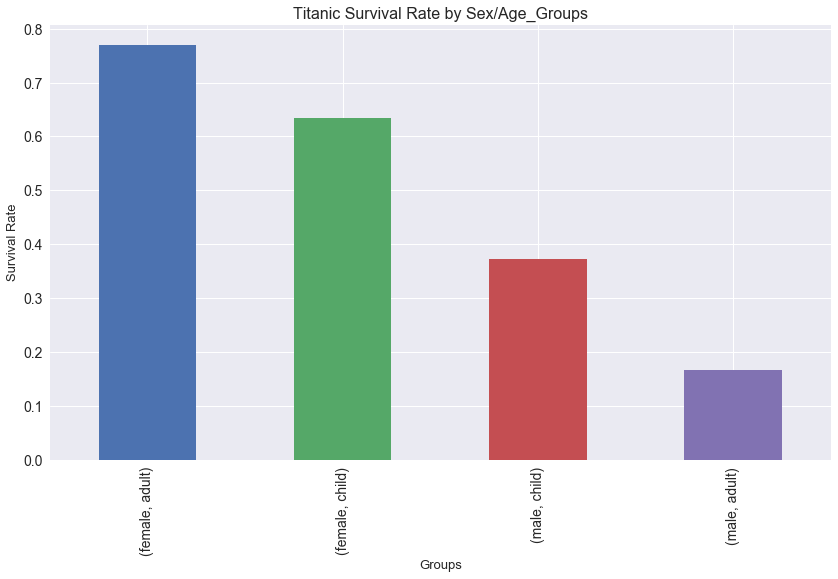

In [64]:
w_and_c_first.plot(kind="bar", figsize=(14,8), fontsize=14)
# plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 13)
plt.xlabel("Groups", fontsize = 13)
plt.ylabel("Survival Rate", fontsize=13)
plt.title("Titanic Survival Rate by Sex/Age_Groups", fontsize=16)
plt.show()

In [66]:
titanic.groupby('Sex')[["Survived","Pclass","Age","Fare"]].agg(["sum","mean"])

Survived           Pclass                 Age                   Fare  \
            sum      mean    sum      mean       sum       mean         sum   
Sex                                                                           
female      233  0.742038    678  2.159236   8704.00  27.719745  13966.6628   
male        109  0.190227   1367  2.385689  17437.17  30.431361  14688.2449   

                   
             mean  
Sex                
female  44.479818  
male    25.633935